In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_file = r'D:\DS_and_AI\ML_Python\Project\Project_3\counterfeit_train.csv'
test_file = r'D:\DS_and_AI\ML_Python\Project\Project_3\counterfeit_test.csv'

In [3]:
data_train = pd.read_csv(train_file)
data_test = pd.read_csv(test_file)

In [4]:
data_train

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535,Area046,1995,204.1452,Hreplacements,mild,0.112963,DownTown,Tier 1,Small,2070.4520
6814,ACW12,20.650,Area046,1995,235.1088,Hreplacements,mild,0.131103,DownTown,Tier 1,Small,2126.3792
6815,OPM10,20.000,Area017,2005,193.6292,Antimalarial,critical,0.105096,DownTown,Tier 2,Unknown,2119.7212
6816,SLY12,10.180,Area045,2000,162.8682,Statins,mild,0.099957,DownTown,Tier 2,Unknown,1485.2138


In [5]:
data_test

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small
...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium


In [6]:
#adding Counterfeit_Sales column to test data
data_test['Counterfeit_Sales'] = np.nan

In [7]:
#adding data column to test and train columns
data_test['data'] = 'test'
data_train['data'] = 'train'

In [8]:
#combining test and train data
dataset = pd.concat([data_train,data_test])

In [9]:
#dropping columns - Active_Since,Medicine_ID,DistArea_ID,SidEffect_Level,Area_dist_level
dataset.drop(['Active_Since','Medicine_ID','DistArea_ID','SidEffect_Level','Area_dist_level'],axis=1,inplace=True)

In [10]:
dataset.isnull().sum()

Counterfeit_Weight     1463
Medicine_MRP              0
Medicine_Type             0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Counterfeit_Sales      1705
data                      0
dtype: int64

In [11]:
#filling NAs with mean
dataset['Counterfeit_Weight'] = dataset.fillna(dataset.mean())

In [12]:
cat_col=['Medicine_Type' , 'Area_Type', 'Area_City_Type']
for col in cat_col:
    print(dataset[col].value_counts())

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64
DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64


In [13]:
#creating dummies
cat_col=['Medicine_Type' , 'Area_Type', 'Area_City_Type']

for col in cat_col :
    k=dataset[col].value_counts(dropna=False)
    cats=k.index[k>50][:-1]
    for cat in cats:
            name=col+'_'+cat
            dataset[name]=(dataset[col]==cat).astype(int)
        
    del dataset[col]

In [14]:
#dropping columns - Medicine_Type,Area_Type
#dataset.drop(['Medicine_Type','Area_Type'],axis=1,inplace=True)

KeyError: "['Medicine_Type' 'Area_Type'] not found in axis"

In [15]:
dataset['Counterfeit_Weight']

0          13.1
1       14.1576
2         9.025
3          11.8
4       14.1576
         ...   
1700    14.1576
1701       21.3
1702       20.4
1703         20
1704       8.08
Name: Counterfeit_Weight, Length: 8523, dtype: object

In [16]:
# converting datatype of Counterfeit_Weight - to numeric
dataset['Counterfeit_Weight'] = pd.to_numeric(dataset['Counterfeit_Weight'],errors='coerce')

In [17]:
for col in dataset.columns:
    print(len(dataset[col]))

8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523
8523


In [18]:
#seperating  the training  and testing data after data preprocessing
#np.where(dataset['data']=='train')

(array([   0,    1,    2, ..., 6815, 6816, 6817], dtype=int64),)

In [20]:
#seperating  the training  and testing data after data preprocessing
dataset_train = dataset.loc[dataset['data']=='train']
dataset_test = dataset.loc[dataset['data']=='test']

In [21]:
dataset_train['data'].unique()

array(['train'], dtype=object)

In [22]:
dataset_test['data'].unique()

array(['test'], dtype=object)

In [23]:
dataset_test.isnull().sum()

Counterfeit_Weight                     0
Medicine_MRP                           0
Availability_rating                    0
Counterfeit_Sales                   1705
data                                   0
Medicine_Type_Antibiotics              0
Medicine_Type_Hreplacements            0
Medicine_Type_Antiseptics              0
Medicine_Type_OralContraceptives       0
Medicine_Type_Antipyretics             0
Medicine_Type_Cardiac                  0
Medicine_Type_Mstablizers              0
Medicine_Type_Tranquilizers            0
Medicine_Type_Analgesics               0
Medicine_Type_Antimalarial             0
Medicine_Type_Antacids                 0
Medicine_Type_Statins                  0
Medicine_Type_MuscleRelaxants          0
Medicine_Type_Antifungal               0
Medicine_Type_Stimulants               0
Area_Type_DownTown                     0
Area_Type_MidTownResidential           0
Area_Type_CityLimits                   0
Area_City_Type_Tier 3                  0
Area_City_Type_T

In [24]:
dataset_train.isnull().sum()

Counterfeit_Weight                  0
Medicine_MRP                        0
Availability_rating                 0
Counterfeit_Sales                   0
data                                0
Medicine_Type_Antibiotics           0
Medicine_Type_Hreplacements         0
Medicine_Type_Antiseptics           0
Medicine_Type_OralContraceptives    0
Medicine_Type_Antipyretics          0
Medicine_Type_Cardiac               0
Medicine_Type_Mstablizers           0
Medicine_Type_Tranquilizers         0
Medicine_Type_Analgesics            0
Medicine_Type_Antimalarial          0
Medicine_Type_Antacids              0
Medicine_Type_Statins               0
Medicine_Type_MuscleRelaxants       0
Medicine_Type_Antifungal            0
Medicine_Type_Stimulants            0
Area_Type_DownTown                  0
Area_Type_MidTownResidential        0
Area_Type_CityLimits                0
Area_City_Type_Tier 3               0
Area_City_Type_Tier 2               0
dtype: int64

In [25]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 25 columns):
Counterfeit_Weight                  1705 non-null float64
Medicine_MRP                        1705 non-null float64
Availability_rating                 1705 non-null float64
Counterfeit_Sales                   0 non-null float64
data                                1705 non-null object
Medicine_Type_Antibiotics           1705 non-null int32
Medicine_Type_Hreplacements         1705 non-null int32
Medicine_Type_Antiseptics           1705 non-null int32
Medicine_Type_OralContraceptives    1705 non-null int32
Medicine_Type_Antipyretics          1705 non-null int32
Medicine_Type_Cardiac               1705 non-null int32
Medicine_Type_Mstablizers           1705 non-null int32
Medicine_Type_Tranquilizers         1705 non-null int32
Medicine_Type_Analgesics            1705 non-null int32
Medicine_Type_Antimalarial          1705 non-null int32
Medicine_Type_Antacids              1705 non-nu

In [26]:
#dropping data column from test and train dataset
dataset_train.drop(['data'],axis=1,inplace=True)
dataset_test.drop(['data'],axis=1,inplace=True)

In [27]:
dataset_train.head()

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,...,Medicine_Type_Antacids,Medicine_Type_Statins,Medicine_Type_MuscleRelaxants,Medicine_Type_Antifungal,Medicine_Type_Stimulants,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2
0,13.100000,160.2366,0.070422,1775.5026,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14.157645,110.4384,0.013000,3069.1520,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,9.025000,259.4092,0.060783,2603.0920,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,11.800000,99.9830,0.065555,1101.7130,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14.157645,56.4402,0.248859,158.9402,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#dropping dummy Counterfeit_Sales sales column from dataset_test
dataset_test.drop(['Counterfeit_Sales'],axis=1,inplace=True)

In [29]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 1704
Data columns (total 23 columns):
Counterfeit_Weight                  1705 non-null float64
Medicine_MRP                        1705 non-null float64
Availability_rating                 1705 non-null float64
Medicine_Type_Antibiotics           1705 non-null int32
Medicine_Type_Hreplacements         1705 non-null int32
Medicine_Type_Antiseptics           1705 non-null int32
Medicine_Type_OralContraceptives    1705 non-null int32
Medicine_Type_Antipyretics          1705 non-null int32
Medicine_Type_Cardiac               1705 non-null int32
Medicine_Type_Mstablizers           1705 non-null int32
Medicine_Type_Tranquilizers         1705 non-null int32
Medicine_Type_Analgesics            1705 non-null int32
Medicine_Type_Antimalarial          1705 non-null int32
Medicine_Type_Antacids              1705 non-null int32
Medicine_Type_Statins               1705 non-null int32
Medicine_Type_MuscleRelaxants       1705 non-nu

In [ ]:
#train_predictors = dataset_train.drop(['Counterfeit_Sales'],axis=1)
#train_target = dataset_train['Counterfeit_Sales']
#test = dataset_test

In [30]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset_train,test_size=0.2,random_state=1)

In [31]:
x_train = train.drop(['Counterfeit_Sales'],axis=1)
y_train = train['Counterfeit_Sales']
x_test = test.drop(['Counterfeit_Sales'],axis=1)
y_test = test['Counterfeit_Sales']

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 2490 to 5157
Data columns (total 23 columns):
Counterfeit_Weight                  5454 non-null float64
Medicine_MRP                        5454 non-null float64
Availability_rating                 5454 non-null float64
Medicine_Type_Antibiotics           5454 non-null int32
Medicine_Type_Hreplacements         5454 non-null int32
Medicine_Type_Antiseptics           5454 non-null int32
Medicine_Type_OralContraceptives    5454 non-null int32
Medicine_Type_Antipyretics          5454 non-null int32
Medicine_Type_Cardiac               5454 non-null int32
Medicine_Type_Mstablizers           5454 non-null int32
Medicine_Type_Tranquilizers         5454 non-null int32
Medicine_Type_Analgesics            5454 non-null int32
Medicine_Type_Antimalarial          5454 non-null int32
Medicine_Type_Antacids              5454 non-null int32
Medicine_Type_Statins               5454 non-null int32
Medicine_Type_MuscleRelaxants       5454 non

In [33]:
y_train

2490    1039.7936
5270    2523.8618
82       302.0872
3960    2757.5576
2362    2965.2872
          ...    
905     2088.4286
5192     318.0664
3980    2224.2518
235      505.8220
5157    3410.7074
Name: Counterfeit_Sales, Length: 5454, dtype: float64

In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 313 to 6507
Data columns (total 23 columns):
Counterfeit_Weight                  1364 non-null float64
Medicine_MRP                        1364 non-null float64
Availability_rating                 1364 non-null float64
Medicine_Type_Antibiotics           1364 non-null int32
Medicine_Type_Hreplacements         1364 non-null int32
Medicine_Type_Antiseptics           1364 non-null int32
Medicine_Type_OralContraceptives    1364 non-null int32
Medicine_Type_Antipyretics          1364 non-null int32
Medicine_Type_Cardiac               1364 non-null int32
Medicine_Type_Mstablizers           1364 non-null int32
Medicine_Type_Tranquilizers         1364 non-null int32
Medicine_Type_Analgesics            1364 non-null int32
Medicine_Type_Antimalarial          1364 non-null int32
Medicine_Type_Antacids              1364 non-null int32
Medicine_Type_Statins               1364 non-null int32
Medicine_Type_MuscleRelaxants       1364 non-

In [35]:
y_test

313     3053.1728
6723    1038.4620
4494    5828.2272
5421    1455.2528
2754     388.6412
          ...    
1652    2360.0750
5478    1567.7730
1884     615.0132
6450    1322.7586
6507    1119.6896
Name: Counterfeit_Sales, Length: 1364, dtype: float64

In [78]:
y_test = pd.DataFrame(y_test)

In [79]:
with pd.ExcelWriter('test_predict_original.xlsx') as writer:
    y_test.to_excel(writer,"Sheet1",index=False)
    y_test.to_excel(writer,"Sheet2")

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lr.intercept_

205.56686914352667

In [39]:
list(zip(x_train.columns,lr.coef_))

[('Counterfeit_Weight', -3.6699484849865174),
 ('Medicine_MRP', 15.441926465295905),
 ('Availability_rating', -207.6455306241474),
 ('Medicine_Type_Antibiotics', -286.07444536392836),
 ('Medicine_Type_Hreplacements', -313.2979603704888),
 ('Medicine_Type_Antiseptics', -328.4167934213048),
 ('Medicine_Type_OralContraceptives', -329.705238169777),
 ('Medicine_Type_Antipyretics', -345.9992820717039),
 ('Medicine_Type_Cardiac', -299.70148735468746),
 ('Medicine_Type_Mstablizers', -308.78158017135985),
 ('Medicine_Type_Tranquilizers', -334.6282838363072),
 ('Medicine_Type_Analgesics', -303.53825317066617),
 ('Medicine_Type_Antimalarial', -296.7230817136468),
 ('Medicine_Type_Antacids', -348.5420673914719),
 ('Medicine_Type_Statins', -303.7107161999211),
 ('Medicine_Type_MuscleRelaxants', -267.01251966922433),
 ('Medicine_Type_Antifungal', -363.94160575259804),
 ('Medicine_Type_Stimulants', -141.24290505119515),
 ('Area_Type_DownTown', 253.82785512814246),
 ('Area_Type_MidTownResidential', -

In [40]:
y_pred = lr.predict(x_test)

In [41]:
y_pred

array([3043.00107356, 1650.10917955, 3306.35870462, ...,  852.81332934,
       2720.6001311 ,  812.76472063])

In [74]:
y_pred = pd.DataFrame(y_pred)

In [75]:
with pd.ExcelWriter('test_predict_lr.xlsx') as writer:
    y_pred.to_excel(writer,"Sheet1",index=False)
    y_pred.to_excel(writer,"Sheet2")

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(y_pred,y_test)

796.1603063481145

In [44]:
#predicting the orginal dataset_test 
final_pred = lr.predict(dataset_test)

In [45]:
dataset_test

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,...,Medicine_Type_Antacids,Medicine_Type_Statins,Medicine_Type_MuscleRelaxants,Medicine_Type_Antifungal,Medicine_Type_Stimulants,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2
0,14.157645,85.5328,0.112747,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,13.450000,257.1460,0.144446,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,7.100000,98.1172,0.144221,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,18.300000,135.3730,0.100388,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,14.157645,112.8016,0.022585,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,14.157645,136.5704,0.050505,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1701,21.300000,57.0744,0.041118,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1702,20.400000,182.7422,0.191273,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1703,20.000000,266.9672,0.013000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
final_pred

array([2776.46745688, 4048.18689946, 1599.53260005, ..., 2865.30780155,
       3877.08578745, 3837.19557916])

In [47]:
final_pred = pd.DataFrame(final_pred)

In [48]:
final_pred

,0
0,2776.467457
1,4048.186899
2,1599.532600
3,161.083706
4,-89.608947
...,...
1700,3550.287114
1701,994.973137
1702,2865.307802
1703,3877.085787


In [ ]:
#with pd.ExcelWriter('linear_predict.xlsx') as writer:
#    final_pred.to_excel(writer,"Sheet1",index=False)
#    final_pred.to_excel(writer,"Sheet2")

# Cross Validation

In [49]:
#cross validation
from sklearn.model_selection import cross_val_score

In [50]:
dataset_train

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,...,Medicine_Type_Antacids,Medicine_Type_Statins,Medicine_Type_MuscleRelaxants,Medicine_Type_Antifungal,Medicine_Type_Stimulants,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2
0,13.100000,160.2366,0.070422,1775.5026,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14.157645,110.4384,0.013000,3069.1520,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,9.025000,259.4092,0.060783,2603.0920,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,11.800000,99.9830,0.065555,1101.7130,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14.157645,56.4402,0.248859,158.9402,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,8.535000,204.1452,0.112963,2070.4520,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6814,20.650000,235.1088,0.131103,2126.3792,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6815,20.000000,193.6292,0.105096,2119.7212,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6816,10.180000,162.8682,0.099957,1485.2138,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [51]:
dataset_predictors = dataset_train.drop(['Counterfeit_Sales'],axis=1)

In [52]:
dataset_target = dataset_train['Counterfeit_Sales']

In [53]:
dataset_predictors

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Medicine_Type_Antibiotics,Medicine_Type_Hreplacements,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,...,Medicine_Type_Antacids,Medicine_Type_Statins,Medicine_Type_MuscleRelaxants,Medicine_Type_Antifungal,Medicine_Type_Stimulants,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_City_Type_Tier 3,Area_City_Type_Tier 2
0,13.100000,160.2366,0.070422,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14.157645,110.4384,0.013000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,9.025000,259.4092,0.060783,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,11.800000,99.9830,0.065555,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14.157645,56.4402,0.248859,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,8.535000,204.1452,0.112963,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6814,20.650000,235.1088,0.131103,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6815,20.000000,193.6292,0.105096,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6816,10.180000,162.8682,0.099957,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [54]:
dataset_target

0       1775.5026
1       3069.1520
2       2603.0920
3       1101.7130
4        158.9402
          ...    
6813    2070.4520
6814    2126.3792
6815    2119.7212
6816    1485.2138
6817    1943.9500
Name: Counterfeit_Sales, Length: 6818, dtype: float64

In [55]:
errors = np.abs(cross_val_score(lr,dataset_predictors,dataset_target,cv=10,scoring='neg_mean_absolute_error'))

In [56]:
errors

array([785.06788928, 859.12641672, 803.27381891, 833.26872356,
       866.5994691 , 843.4162461 , 814.8645688 , 803.56311547,
       843.68733936, 832.93530554])

In [57]:
avg_error=errors.mean()
error_std=np.std(errors)

In [58]:
avg_error

828.5802892840154

In [59]:
error_std

24.930957594149085

In [60]:
lr.predict(dataset_test)

array([2776.46745688, 4048.18689946, 1599.53260005, ..., 2865.30780155,
       3877.08578745, 3837.19557916])

# Regularization Techniques

In [61]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
lambdas = np.linspace(1,100,200)
params = {'alpha':lambdas}

In [64]:
params

{'alpha': array([  1.        ,   1.49748744,   1.99497487,   2.49246231,
          2.98994975,   3.48743719,   3.98492462,   4.48241206,
          4.9798995 ,   5.47738693,   5.97487437,   6.47236181,
          6.96984925,   7.46733668,   7.96482412,   8.46231156,
          8.95979899,   9.45728643,   9.95477387,  10.45226131,
         10.94974874,  11.44723618,  11.94472362,  12.44221106,
         12.93969849,  13.43718593,  13.93467337,  14.4321608 ,
         14.92964824,  15.42713568,  15.92462312,  16.42211055,
         16.91959799,  17.41708543,  17.91457286,  18.4120603 ,
         18.90954774,  19.40703518,  19.90452261,  20.40201005,
         20.89949749,  21.39698492,  21.89447236,  22.3919598 ,
         22.88944724,  23.38693467,  23.88442211,  24.38190955,
         24.87939698,  25.37688442,  25.87437186,  26.3718593 ,
         26.86934673,  27.36683417,  27.86432161,  28.36180905,
         28.85929648,  29.35678392,  29.85427136,  30.35175879,
         30.84924623,  31.34673

In [65]:
model = Ridge(fit_intercept=True)

In [66]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.        ,   1.49748744,   1.99497487,   2.49246231,
         2.98994975,   3.48743719,   3.98492462,   4.48241206,
         4.9798995 ,   5.47738693,   5.97487437,   6.47236...
        88.55778894,  89.05527638,  89.55276382,  90.05025126,
        90.54773869,  91.04522613,  91.54271357,  92.04020101,
        92.53768844,  93.03517588,  93.53266332,  94.03015075,
        94.52763819,  95.02512563,  95.52261307,  96.0201005 ,
        96.51758794,  97.01507538,  97.51256281,  98.01005025,
        98.50753769,  99.00502513,  99.50251256, 100.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [86]:
grid_search.best_estimator_

Ridge(alpha=49.256281407035175, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
ridge = grid_search.best_estimator_

In [88]:
ridge.fit(x_train,y_train)

Ridge(alpha=49.256281407035175, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
ridge.coef_

array([   -3.75837954,    15.4435677 ,   -92.51838795,     2.44798864,
         -21.46436004,   -36.33019821,   -39.50526844,   -52.48950633,
          -6.94214073,   -18.05976743,   -38.85857753,   -15.80705512,
          -6.86375467,   -46.00203085,    -5.81435065,     9.11179307,
         -43.35742695,    81.41791774,   261.44081124, -1541.45413936,
        1525.40071324,   -11.03516893,    48.80777262])

In [69]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [71]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -834.790 (std: 31.502)
Parameters: {'alpha': 49.256281407035175}

Model with rank: 2
Mean validation score: -834.790 (std: 31.494)
Parameters: {'alpha': 48.75879396984924}

Model with rank: 3
Mean validation score: -834.791 (std: 31.487)
Parameters: {'alpha': 48.26130653266332}

Model with rank: 4
Mean validation score: -834.791 (std: 31.509)
Parameters: {'alpha': 49.753768844221106}

Model with rank: 5
Mean validation score: -834.792 (std: 31.516)
Parameters: {'alpha': 50.25125628140703}



In [72]:
test_pred=grid_search.predict(x_test)

In [73]:
test_pred

array([2921.21985317, 1676.69833167, 3280.18641238, ...,  846.01398126,
       2303.46198241,  840.78073516])

In [76]:
#vali
test_pred = pd.DataFrame(test_pred)

In [77]:
with pd.ExcelWriter('test_predict_ridge.xlsx') as writer:
    test_pred.to_excel(writer,"Sheet1",index=False)
    test_pred.to_excel(writer,"Sheet2")

In [98]:
#calculating mena absolute erroe
mean_absolute_error(test_pred,y_test)

795.165532443097

In [80]:
y_pred_ridge = grid_search.predict(dataset_test)

In [82]:
y_pred_ridge = pd.DataFrame(y_pred_ridge)

In [83]:
with pd.ExcelWriter('test_predict_ridge_final.xlsx') as writer:
    y_pred_ridge.to_excel(writer,"Sheet1",index=False)
    y_pred_ridge.to_excel(writer,"Sheet2")

In [93]:
list(zip(x_train.columns,ridge.coef_))

[('Counterfeit_Weight', -3.7583795448986224),
 ('Medicine_MRP', 15.44356770002053),
 ('Availability_rating', -92.51838794612254),
 ('Medicine_Type_Antibiotics', 2.447988641446672),
 ('Medicine_Type_Hreplacements', -21.46436003755592),
 ('Medicine_Type_Antiseptics', -36.330198210108016),
 ('Medicine_Type_OralContraceptives', -39.505268438133726),
 ('Medicine_Type_Antipyretics', -52.48950632643109),
 ('Medicine_Type_Cardiac', -6.942140725516659),
 ('Medicine_Type_Mstablizers', -18.059767428840257),
 ('Medicine_Type_Tranquilizers', -38.85857753274258),
 ('Medicine_Type_Analgesics', -15.807055122965052),
 ('Medicine_Type_Antimalarial', -6.863754669376664),
 ('Medicine_Type_Antacids', -46.00203085159288),
 ('Medicine_Type_Statins', -5.8143506455440725),
 ('Medicine_Type_MuscleRelaxants', 9.11179306716348),
 ('Medicine_Type_Antifungal', -43.35742694711609),
 ('Medicine_Type_Stimulants', 81.41791773540724),
 ('Area_Type_DownTown', 261.44081123615865),
 ('Area_Type_MidTownResidential', -1541.4

In [94]:
predictors = x_train.columns

In [95]:
coef = pd.Series(ridge.coef_,predictors).sort_values()

In [96]:
coef

Area_Type_MidTownResidential       -1541.454139
Availability_rating                  -92.518388
Medicine_Type_Antipyretics           -52.489506
Medicine_Type_Antacids               -46.002031
Medicine_Type_Antifungal             -43.357427
Medicine_Type_OralContraceptives     -39.505268
Medicine_Type_Tranquilizers          -38.858578
Medicine_Type_Antiseptics            -36.330198
Medicine_Type_Hreplacements          -21.464360
Medicine_Type_Mstablizers            -18.059767
Medicine_Type_Analgesics             -15.807055
Area_City_Type_Tier 3                -11.035169
Medicine_Type_Cardiac                 -6.942141
Medicine_Type_Antimalarial            -6.863755
Medicine_Type_Statins                 -5.814351
Counterfeit_Weight                    -3.758380
Medicine_Type_Antibiotics              2.447989
Medicine_Type_MuscleRelaxants          9.111793
Medicine_MRP                          15.443568
Area_City_Type_Tier 2                 48.807773
Medicine_Type_Stimulants              81

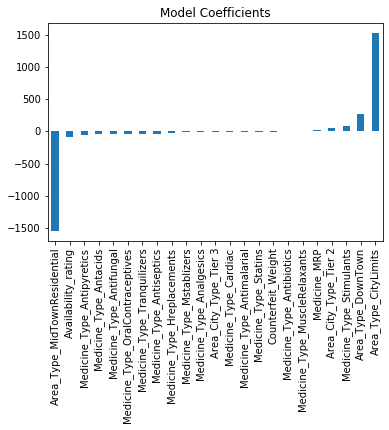

In [97]:
coef.plot(kind='bar', title='Model Coefficients')

# LASSO


In [99]:
lambdas=np.linspace(0.1,10,200)
lambdas

array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.59246231,  1.64221106,  1.6919598 ,  1.74170854,  1.79145729,
        1.84120603,  1.89095477,  1.94070352,  1.99045226,  2.04020101,
        2.08994975,  2.13969849,  2.18944724,  2.23919598,  2.28894472,
        2.33869347,  2.38844221,  2.43819095,  2.4879397 ,  2.53768844,
        2.58743719,  2.63718593,  2.68693467,  2.73668342,  2.78643216,
        2.8361809 ,  2.88592965,  2.93567839,  2.98542714,  3.03517588,
        3.08492462,  3.13467337,  3.18442211,  3.23417085,  3.2839196 ,
        3.33366834,  3.38341709,  3.43316583,  3.48291457,  3.53

In [100]:
params={'alpha':lambdas}

In [101]:
model = Lasso(fit_intercept=True)

In [102]:
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [104]:
lasso=grid_search.best_estimator_

In [105]:
lasso

Lasso(alpha=8.756281407035177, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
lasso.fit(x_train,y_train)

Lasso(alpha=8.756281407035177, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
y_pred_lasso = lasso.predict(x_test)

In [112]:
y_pred_lasso

array([2955.93902039, 1669.69858086, 3261.77889654, ...,  835.27068228,
       2329.82027888,  862.39310534])

In [113]:
y_pred_lasso = pd.DataFrame(y_pred_lasso)

In [126]:
mean_absolute_error(y_pred_lasso,y_test)

794.8996064013947

In [114]:
with pd.ExcelWriter('test_predict_lasso.xlsx') as writer:
    y_pred_lasso.to_excel(writer,"Sheet1",index=False)
    y_pred_lasso.to_excel(writer,"Sheet2")

In [117]:
final_pred_lasso = lasso.predict(dataset_test)

In [118]:
final_pred_lasso

array([2680.57896473, 4054.87590271, 1622.40992166, ..., 2883.85522592,
       3948.78583832, 3789.1938145 ])

In [119]:
final_pred_lasso = pd.DataFrame(final_pred_lasso)

In [120]:
with pd.ExcelWriter('test_predict_lasso_final.xlsx') as writer:
    final_pred_lasso.to_excel(writer,"Sheet1",index=False)
    final_pred_lasso.to_excel(writer,"Sheet2")

In [121]:
list(zip(x_train.columns,lasso.coef_))

[('Counterfeit_Weight', -3.3220847894464454),
 ('Medicine_MRP', 15.428408058538738),
 ('Availability_rating', -0.0),
 ('Medicine_Type_Antibiotics', 0.0),
 ('Medicine_Type_Hreplacements', -0.0),
 ('Medicine_Type_Antiseptics', -0.0),
 ('Medicine_Type_OralContraceptives', -0.0),
 ('Medicine_Type_Antipyretics', -0.0),
 ('Medicine_Type_Cardiac', 0.0),
 ('Medicine_Type_Mstablizers', 0.0),
 ('Medicine_Type_Tranquilizers', -0.0),
 ('Medicine_Type_Analgesics', 0.0),
 ('Medicine_Type_Antimalarial', 0.0),
 ('Medicine_Type_Antacids', -0.0),
 ('Medicine_Type_Statins', 0.0),
 ('Medicine_Type_MuscleRelaxants', 0.0),
 ('Medicine_Type_Antifungal', -0.0),
 ('Medicine_Type_Stimulants', 0.0),
 ('Area_Type_DownTown', 201.1687519354141),
 ('Area_Type_MidTownResidential', -1649.4631292360948),
 ('Area_Type_CityLimits', 1511.6282873949178),
 ('Area_City_Type_Tier 3', -19.489321872331054),
 ('Area_City_Type_Tier 2', 15.197816439176323)]

In [122]:
predictors = x_train.columns

In [123]:
coef = pd.Series(lasso.coef_,predictors).sort_values()

In [124]:
coef

Area_Type_MidTownResidential       -1649.463129
Area_City_Type_Tier 3                -19.489322
Counterfeit_Weight                    -3.322085
Medicine_Type_Stimulants               0.000000
Medicine_Type_Antifungal              -0.000000
Medicine_Type_MuscleRelaxants          0.000000
Medicine_Type_Statins                  0.000000
Medicine_Type_Antacids                -0.000000
Medicine_Type_Antimalarial             0.000000
Medicine_Type_Tranquilizers           -0.000000
Medicine_Type_Analgesics               0.000000
Medicine_Type_Cardiac                  0.000000
Medicine_Type_Antipyretics            -0.000000
Medicine_Type_OralContraceptives      -0.000000
Medicine_Type_Antiseptics             -0.000000
Medicine_Type_Hreplacements           -0.000000
Medicine_Type_Antibiotics              0.000000
Availability_rating                   -0.000000
Medicine_Type_Mstablizers              0.000000
Area_City_Type_Tier 2                 15.197816
Medicine_MRP                          15

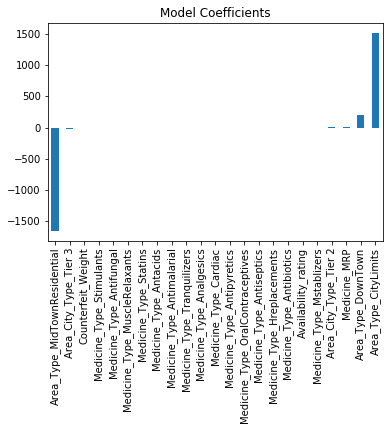

In [125]:
coef.plot(kind='bar', title='Model Coefficients')

# ElasticNet


In [129]:
from sklearn.linear_model import ElasticNet

In [127]:
lambdas=np.linspace(0.1,10,200)
lambdas

array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.59246231,  1.64221106,  1.6919598 ,  1.74170854,  1.79145729,
        1.84120603,  1.89095477,  1.94070352,  1.99045226,  2.04020101,
        2.08994975,  2.13969849,  2.18944724,  2.23919598,  2.28894472,
        2.33869347,  2.38844221,  2.43819095,  2.4879397 ,  2.53768844,
        2.58743719,  2.63718593,  2.68693467,  2.73668342,  2.78643216,
        2.8361809 ,  2.88592965,  2.93567839,  2.98542714,  3.03517588,
        3.08492462,  3.13467337,  3.18442211,  3.23417085,  3.2839196 ,
        3.33366834,  3.38341709,  3.43316583,  3.48291457,  3.53

In [131]:
model=ElasticNet(fit_intercept=True)
params={'alpha':lambdas}

In [132]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [136]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.2989949...
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,